In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.dates as mandates

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
from sklearn import linear_model

from keras.layers import LSTM, Dense, Dropout
from keras.models import Sequential

In [2]:
data = pd.read_csv('Google_Historical_StockPrice2.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-03-28,736.789978,738.989990,732.500000,733.530029,733.530029,1301300
1,2016-03-29,734.590027,747.250000,728.760010,744.770020,744.770020,1903800
2,2016-03-30,750.099976,757.880005,748.739990,750.530029,750.530029,1782400
3,2016-03-31,749.250000,750.849976,740.940002,744.950012,744.950012,1718800
4,2016-04-01,738.599976,750.340027,737.000000,749.909973,749.909973,1576700


<AxesSubplot:>

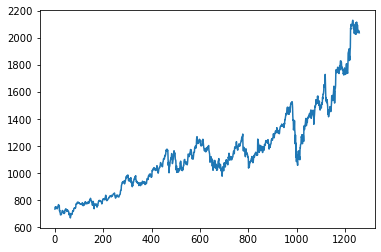

In [3]:
data['Adj Close'].plot()

In [4]:
features = ['Open' , 'High', 'Low','Volume']
feature_tf = data[features]
feature_tf

,Open,High,Low,Volume
0,736.789978,738.989990,732.500000,1301300
1,734.590027,747.250000,728.760010,1903800
2,750.099976,757.880005,748.739990,1782400
3,749.250000,750.849976,740.940002,1718800
4,738.599976,750.340027,737.000000,1576700
...,...,...,...,...
1255,2041.839966,2057.989990,2026.069946,1954800
1256,2051.699951,2072.302002,2039.219971,1367000
1257,2065.370117,2078.209961,2041.555054,1154000
1258,2044.810059,2058.870117,2010.729980,1418900


In [7]:
close_price = data['Adj Close']
close_price = pd.DataFrame(data=close_price.values.ravel(), columns=['Adj Close'],index=data['Date'])
close_price

,Adj Close
Date,
2016-03-28,733.530029
2016-03-29,744.770020
2016-03-30,750.530029
2016-03-31,744.950012
2016-04-01,749.909973
...,...
2021-03-22,2038.589966
2021-03-23,2052.959961
2021-03-24,2045.060059


In [18]:
timesplit = TimeSeriesSplit(n_splits=5)
for train_idx , test_idx in timesplit.split(feature_tf):
    X_train , X_test = feature_tf[:len(train_idx)],feature_tf[len(train_idx):len(train_idx)+len(test_idx)]
    y_train , y_test = close_price[:len(train_idx)].values.ravel() , close_price[len(train_idx):len(train_idx)+len(test_idx)].values.ravel()

In [19]:
X_train

,Open,High,Low,Volume
0,736.789978,738.989990,732.500000,1301300
1,734.590027,747.250000,728.760010,1903800
2,750.099976,757.880005,748.739990,1782400
3,749.250000,750.849976,740.940002,1718800
4,738.599976,750.340027,737.000000,1576700
...,...,...,...,...
1045,1389.579956,1410.420044,1387.250000,1655400
1046,1408.000000,1415.489990,1393.449951,1385000
1047,1396.709961,1412.760010,1391.829956,1309400
1048,1437.270020,1441.000000,1412.130005,2060600


In [20]:
X_test

,Open,High,Low,Volume
1050,1396.859985,1440.839966,1396.000000,1692200
1051,1416.939941,1432.569946,1413.349976,1820900
1052,1418.390015,1437.959961,1418.000000,1217100
1053,1430.550049,1439.609985,1418.829956,1278100
1054,1438.300049,1446.552002,1429.776978,1256200
...,...,...,...,...
1255,2041.839966,2057.989990,2026.069946,1954800
1256,2051.699951,2072.302002,2039.219971,1367000
1257,2065.370117,2078.209961,2041.555054,1154000
1258,2044.810059,2058.870117,2010.729980,1418900


In [21]:
scaller = MinMaxScaler()
X_train_sc = scaller.fit_transform(feature_tf)
X_test_sc = scaller.transform(X_test)

In [23]:
X_train_sc = pd.DataFrame(data=X_train_sc, columns=X_train.columns)
X_train_sc

,Open,High,Low,Volume
0,0.077031,0.077564,0.080660,0.162778
1,0.074455,0.087171,0.076302,0.265603
2,0.092615,0.099534,0.099586,0.244884
3,0.091620,0.091358,0.090496,0.234030
4,0.079150,0.090765,0.085904,0.209779
...,...,...,...,...
1045,0.841360,0.858473,0.843669,0.223210
1046,0.862927,0.864369,0.850894,0.177063
1047,0.849708,0.861194,0.849006,0.164161
1048,0.897198,0.894039,0.872663,0.292363


In [24]:
xtrain = np.array(X_train_sc)
xtest = np.array(X_test_sc)
X_train_sc = xtrain.reshape(X_train.shape[0],1,X_train.shape[1])
X_test_sc = xtest.reshape(X_test.shape[0],1,X_test.shape[1])

In [26]:
X_test_sc.shape

(210, 1, 4)

In [28]:
X_train_sc.shape

(1050, 1, 4)

In [42]:
lstm = Sequential()
lstm.add(LSTM(32,input_shape=(1, xtrain.shape[1]),activation='relu',return_sequences=False))
lstm.add(Dense(1))
lstm.compile(optimizer='adam',loss='mean_squared_error')

In [43]:
lstm.fit(X_train_sc,y_train,batch_size=4,epochs=150,verbose=1)

Epoch 1/150
263/263 [==============================] - 2s 2ms/step - loss: 1118297.2500
Epoch 2/150
263/263 [==============================] - 0s 2ms/step - loss: 1097193.8750
Epoch 3/150
263/263 [==============================] - 0s 2ms/step - loss: 1049583.1250
Epoch 4/150
263/263 [==============================] - 0s 2ms/step - loss: 984277.7500
Epoch 5/150
263/263 [==============================] - 0s 2ms/step - loss: 908033.2500
Epoch 6/150
263/263 [==============================] - 1s 2ms/step - loss: 824532.7500
Epoch 7/150
263/263 [==============================] - 0s 2ms/step - loss: 737029.8125
Epoch 8/150
263/263 [==============================] - 1s 2ms/step - loss: 647990.3750
Epoch 9/150
263/263 [==============================] - 1s 2ms/step - loss: 559755.2500
Epoch 10/150
263/263 [==============================] - 0s 2ms/step - loss: 474600.7188
Epoch 11/150
263/263 [==============================] - 0s 2ms/step - loss: 394171.8750
Epoch 12/150
263/263 [================

263/263 [==============================] - 0s 2ms/step - loss: 131.9244
Epoch 97/150
263/263 [==============================] - 0s 2ms/step - loss: 125.5444
Epoch 98/150
263/263 [==============================] - 0s 2ms/step - loss: 119.0130
Epoch 99/150
263/263 [==============================] - 0s 2ms/step - loss: 113.5089
Epoch 100/150
263/263 [==============================] - 1s 2ms/step - loss: 108.8930
Epoch 101/150
263/263 [==============================] - 1s 2ms/step - loss: 103.4943
Epoch 102/150
263/263 [==============================] - 1s 2ms/step - loss: 100.9582
Epoch 103/150
263/263 [==============================] - 0s 2ms/step - loss: 98.0059
Epoch 104/150
263/263 [==============================] - 0s 2ms/step - loss: 95.8405
Epoch 105/150
263/263 [==============================] - 0s 2ms/step - loss: 93.7639
Epoch 106/150
263/263 [==============================] - 0s 2ms/step - loss: 92.1714
Epoch 107/150
263/263 [==============================] - 0s 2ms/step - loss

In [44]:
predict = lstm.predict(X_test_sc)

7/7 [==============================] - 0s 2ms/step


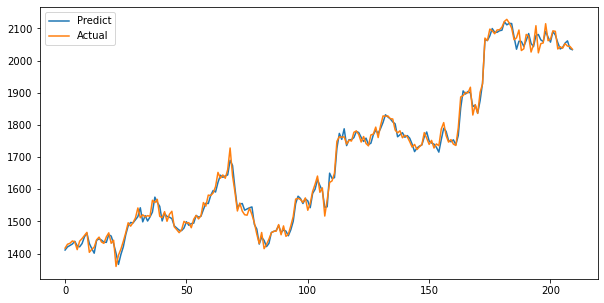

In [45]:
plt.figure(figsize=(10,5))
plt.plot(predict,label='Predict')
plt.plot(y_test,label='Actual')
plt.legend()
plt.show()

In [46]:
r2_score(y_test,predict)

0.9949241454248965

In [47]:
mean_squared_error(y_test,predict)

248.26421612352127